In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import spectrum
from pyleoclim import Spectral
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from tqdm import tqdm
from pyhht import EMD

In [2]:
def get_trend(y, SNR_threshold=0.2):                                                                               
    # here a trend is defined as the lowest frequency component that has                                           
    # significantly larger energy than other higher frequency components                                           
    decomposer = EMD(y)                                                                                            
    imfs = decomposer.decompose()                                                                                  
    nimf = np.shape(imfs)[0]                                                                                       
    if nimf == 1:                                                                                                  
        print('No trend is detected')                                                                              
        trend = np.zeros(np.size(y))                                                                               
    else:                                                                                                          
        imf_vars = []                                                                                              
        for imf in imfs:                                                                                           
            imf_vars.append(np.var(imf))                                                                           
        sorted_vars = sorted(set(imf_vars))                                                                        
        max_var = sorted_vars[-1]                                                                                  
        second_max_var = sorted_vars[-2]                                                                           
                                                                                                                   
        # treat second_max_var as signal and max_var as noise                                                      
        SNR = second_max_var / max_var                                                                             
        if SNR <= SNR_threshold:                                                                                   
            # when SNR is too low, we think the mode with largest                                                  
            # variance is disturbing and should be removed                                                         
            imax = np.argmax(max_var)                                                                              
            trend = np.sum(imfs[imax:], axis=0)                                                                    
        else:                                                                                                      
            print('No trend is detected')                                                                          
            trend = np.zeros(np.size(y))                                                                           
                                                                                                                   
    return trend

In [3]:
time = np.arange(2001)
f = 1/50
signal = np.cos(2*np.pi*f*time)

slope = 0.01
intercept = -1
linear_trend = slope*time + intercept

slope = 1e-5
intercept = -1
nonlinear_trend = slope*time**2 + intercept

sin_trend = 5*np.sin(2*np.pi*1/1000*time)

signal_linear_trend = signal + linear_trend
signal_nonlinear_trend = signal + nonlinear_trend
signal_sin_trend = signal + sin_trend

In [7]:
detected_none_trend = get_trend(signal)
detected_linear_trend = get_trend(signal_linear_trend)
detected_nonlinear_trend = get_trend(signal_nonlinear_trend)
detected_sin_trend = get_trend(signal_sin_trend, SNR_threshold=0.2)

No trend is detected


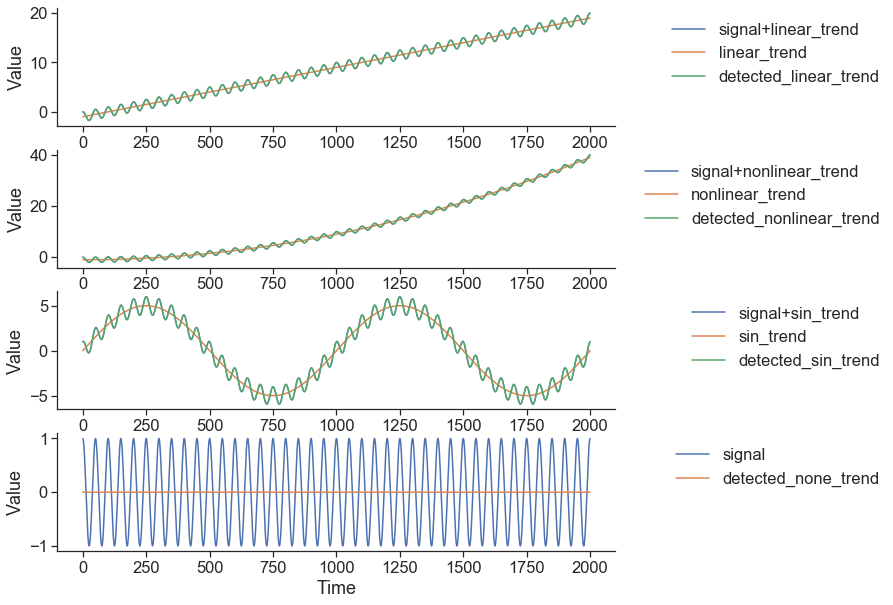

In [8]:
sns.set(style='ticks', font_scale=1.5)
fig = plt.figure(figsize=[10, 10])                                                                                                                                           
ax1 = plt.subplot(4, 1, 1)
ax1.plot(time, signal_linear_trend, label='signal+linear_trend')                                                                                                                                                          
ax1.plot(time, linear_trend, label='linear_trend')                                                                                                                                                          
ax1.plot(time, detected_linear_trend, label='detected_linear_trend')                                                                                                                                                          
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel('Value')
ax1.set_xlabel('Time')
ax1.legend(frameon=False, bbox_to_anchor=(1.5, 1), loc='upper right')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(time, signal_nonlinear_trend, label='signal+nonlinear_trend')                                                                                                                                                          
ax2.plot(time, nonlinear_trend, label='nonlinear_trend')                                                                                                                                                          
ax2.plot(time, detected_nonlinear_trend, label='detected_nonlinear_trend')                                                                                                                                                          
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('Value')
ax2.set_xlabel('Time')
ax2.legend(frameon=False, bbox_to_anchor=(1.5, 1), loc='upper right')

ax3 = plt.subplot(4, 1, 3)
ax3.plot(time, signal_sin_trend, label='signal+sin_trend')                                                                                                                                                          
ax3.plot(time, sin_trend, label='sin_trend')                                                                                                                                                          
ax3.plot(time, detected_sin_trend, label='detected_sin_trend')                                                                                                                                                          
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel('Value')
ax3.set_xlabel('Time')
ax3.legend(frameon=False, bbox_to_anchor=(1.5, 1), loc='upper right')

ax4 = plt.subplot(4, 1, 4)
ax4.plot(time, signal, label='signal')                                                                                                                                                          
ax4.plot(time, detected_none_trend, label='detected_none_trend')                                                                                                                                                          
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylabel('Value')
ax4.set_xlabel('Time')
ax4.legend(frameon=False, bbox_to_anchor=(1.5, 1), loc='upper right')

## draft

In [2]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
def run_EMD_plot(time, signal, slope=0.01, intercept=-1, power=1):
    real_trend = slope*time**power + intercept

    decomposer = EMD(signal+real_trend)
    imfs = decomposer.decompose()
    nimf = np.shape(imfs)[0]
    if nimf == 1:
        detected_trend = np.zeros(np.size(time))
    else:
        detected_trend = imfs[-1]
    
    sns.set(style='ticks', font_scale=1.5)
    fig, ax = plt.subplots(figsize=[10, 5])                                                                                                                                           
    ax.plot(time, signal+real_trend, label='signal+trend')                                                                                                                                                          
    ax.plot(time, real_trend, label='real_trend')                                                                                                                                                          
    ax.plot(time, detected_trend, label='detected_trend')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Value')
    ax.set_xlabel('Time')
    ax.legend(frameon=False, bbox_to_anchor=(1.3, 1), loc='upper right')
    
def interact_EMD(slope, power):
    time = np.arange(2001)
    f = 1/50
    signal = np.cos(2*np.pi*f*time)
    print(f'slope={slope:.5f}, power={power:.5f}')
    return run_EMD_plot(time, signal, slope=slope, power=power)

In [20]:
slope = widgets.FloatSlider(min=0, max=0.1, step=1e-4)
power = widgets.FloatSlider(min=1, max=2, step=1e-1)
widgets.interact(interact_EMD, slope=slope, power=power)

interactive(children=(FloatSlider(value=0.0, description='slope', max=0.1, step=0.0001), FloatSlider(value=1.0…

<function __main__.interact_EMD(slope, power)>